In [2]:
#导入必要的包
from textblob import TextBlob
import numpy as np
import pandas as pd
import time
from textblob import TextBlob
import nltk
import pdb
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

[nltk_data] Downloading package stopwords to /Users/mayue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#导入源数据
original=pd.read_excel("/Users/mayue/Desktop/language combine of reviews.xlsx")
review_text=original.iloc[:,6]#获取评论内容
title=original[:,5]
review=ogiinal[:,7]
review_translated=[]
review_orginal=[]

In [3]:
original

,uer ID,user name,city or area,country or region,title,translated_title,content,translated_review,month,year,score
0,644597847,Applesauce1542,NaN,NaN,Moomin love,Moomin love,Never have I been to such a wonderful place! F...,Never have I been to such a wonderful place! F...,February,2018.0,5
1,635923069,HudaAli,Singapore,Singapore,Never heard of Moomin before this but fell in ...,Never heard of Moomin before this but fell in ...,Everything was in Finnish but I actually enjoy...,Everything was in Finnish but I actually enjoy...,July,2018.0,4
2,629530600,maricono,Helsinki,Finland,Must visit in naantali,Must visit in naantali,"From turku we rode the t82 bus to naantali, fr...","From turku we rode the t82 bus to naantali, fr...",October,2018.0,5
3,612565610,tursever,St. Petersburg,Russia,В гостях у сказки,Visiting a fairy tale,Долина Муми-троллей интереснейшее место не тол...,Moomin Valley is an interesting place not only...,September,2017.0,5
4,611032381,HessuHelsinki,Helsinki,Finland,Place for one visit,Place for one visit,"Always for me muumiland was air, now with chil...","Always for me moomin land was air, now with ch...",August,2018.0,3
5,609761445,sKondoR,St. Petersburg,Russia,"Здорово, даже очень здорово.","Great, even very cool.",Сын очень любит книжки про мумми-тролей и эту ...,The son loves books about moomin trolls and wa...,August,2018.0,5
6,608551445,TrawelmanSwe,Stockholm,Sweden,Förutsätter att barnen är intresserade av Mumi...,Assumes that the children are interested in th...,Vi var här med en 6-åring och han var måttligt...,We were here with a 6 year old and he was mode...,August,2018.0,3
7,608483125,Roving650557,NaN,NaN,ムーミンカフェ,Moomin Cafe,ナーンタリにあるムーミンカフェに行きました。店の中もスイーツも全てかわいいです。壁にはムーミ...,I went to Moomin Cafe in Naantali. All the swe...,August,2018.0,4
8,607920034,RallyHulda,Stockholm County,Sweden,Besviken förväntan,Disappointed expectation,Vi kom till Mumindalen kl 10.30 shade beställt...,We arrived at Moomin land at 10.30 am shade or...,August,2018.0,3
9,606044351,Dave P,Newcastle upon Tyne,United Kingdom,Day visit,Day visit,Well worth visiting for people with kids. Bein...,Well worth visiting for people with kids. Bein...,August,2018.0,5


In [ ]:
#使用googleAPI将所有文本都翻译成英语，并存入list中
from googletrans import Translator
for i in review_text:
    translator = Translator(service_urls=['translate.google.cn'])
    source = i
    src = 'auto'
    dest = 'en'
    try:
        trans_result = translator.translate(source,src = src,dest = dest)
        a=trans_result.text
    except:
        a="#####"
        
    print(a)
    review_translated.append(a)
    review_orginal.append(i)
    time.sleep(1)    
    


In [ ]:
#获取评论标题数据
review_title=original.iloc[:,4]
review_title

In [ ]:
#将评论标题翻译成英语
review_title=original.iloc[:,4]
title_translated=[]
title_orginal=[]
for i in review_title:
    translator = Translator(service_urls=['translate.google.com'])
    source = i
    src = 'auto'
    dest = 'en'
    try:
        trans_result = translator.translate(source,src = src,dest = dest)
        a=trans_result.text
    except:
        a="#####"
        
    print(a)
    title_translated.append(a)
    title_orginal.append(i)
#     time.sleep(1)    
    

In [ ]:
#将生成的翻译和原始文本合并到一个数据框中
df={'original_title':title_orginal,'translated_title':title_translated,'original_review':review_orginal,'translated_review':review_translated}

In [ ]:
#转换数据格式
df=pd.DataFrame(df)

In [ ]:
#对评论内容调用情感分析函数，结果存入sentiments_polarity和sentiments_subjectivity中
sentiments_polarity=[]
sentiments_subjectivity=[]
for i in review_translated:
    blob=TextBlob(i)
    sentiments_polarity.append(blob.sentiment.polarity)
    sentiments_subjectivity.append(blob.sentiment.subjectivity)

In [ ]:
#将评论情感转换为数据框
df2=pd.DataFrame({'review_sentiments_polarity':sentiments_polarity,'review_sentiments_subjectivity':sentiments_subjectivity})

In [ ]:
#对评论标题调用情感分析函数，结果存入sentiments_polarity和sentiments_subjectivity中
sentiments_polarity=[]
sentiments_polarity=[]
sentiments_subjectivity=[]
for i in title_translated:
    blob=TextBlob(i)
    sentiments_polarity.append(blob.sentiment.polarity)
    sentiments_subjectivity.append(blob.sentiment.subjectivity)

In [ ]:
#将标题情感转换为数据框
df3=pd.DataFrame({'title_sentiments_polarity':sentiments_polarity,'title_sentiments_subjectivity':sentiments_subjectivity})

In [ ]:
#合并所有的情感数据
dff=pd.concat([df,df2,df3],axis=1)
#存到csv文件中
dff.to_csv('hehe.csv',encoding='utf8')

In [105]:
from matplotlib import pyplot


In [108]:
dff.columns

Index([u'original_review', u'original_title', u'translated_review',
       u'translated_title', u'review_sentiments_polarity',
       u'review_sentiments_subjectivity', u'title_sentiments_polarity',
       u'title_sentiments_subjectivity'],
      dtype='object')

In [110]:
dff['review_sentiments_polarity']

0      0.487500
1      0.700000
2      0.346091
3      0.063070
4      0.000000
5      0.356471
6      0.128125
7      0.283333
8     -0.016667
9      0.057143
10    -0.075000
11     0.510000
12     0.587500
13     0.243750
14     0.144722
15     0.020238
16     0.035962
17     0.543750
18     0.219473
19     0.180530
20     0.115000
21     0.252083
22     0.115641
23     0.456250
24     0.550000
25     0.021667
26     0.346474
27     0.116667
28     0.225000
29     0.110417
         ...   
377   -0.055556
378    0.134375
379    0.182812
380    0.169231
381    0.059375
382    0.336027
383    0.074630
384    0.210443
385    0.220915
386    0.105955
387    0.487250
388    0.265714
389    0.182292
390    0.192025
391    0.407083
392    0.234375
393    0.163079
394    0.354762
395    0.177022
396    0.170833
397    0.437500
398    0.500000
399    0.418519
400    0.300000
401    0.115192
402    0.129167
403    0.234167
404   -0.042648
405    0.361111
406    0.000000
Name: review_sentiments_

(array([  3.,   2.,  38., 130., 107.,  86.,  29.,   7.,   2.,   3.]),
 array([-0.375 , -0.2375, -0.1   ,  0.0375,  0.175 ,  0.3125,  0.45  ,
         0.5875,  0.725 ,  0.8625,  1.    ]),
 <a list of 10 Patch objects>)

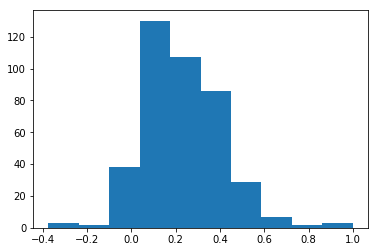

In [111]:
pyplot.hist(dff['review_sentiments_polarity'])

In [46]:
data=pd.read_csv("/Users/mayue/Desktop/hehe.csv",encoding='utf-8')
text=data['translated_review']

In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [52]:
test_doc = nlp(text)



In [4]:
text=text.decode("utf8")

AttributeError: 'Series' object has no attribute 'decode'

In [68]:
ent_dict={'entity':[],'label':[]}
for ent in test_doc.ents:
    print(ent, ent.label_)
    if str(ent)!='\n':
        ent_dict['entity'].append(ent)
        ent_dict['label'].append(ent.label_)

(
, u'GPE')
(Finnish, u'NORP')
(
, u'GPE')
(
, u'GPE')
(     Moomin Valley, u'PERSON')
(
, u'GPE')
(
, u'GPE')
(     , u'GPE')
(
, u'GPE')
(6 year old, u'DATE')
(
, u'GPE')
(     , u'GPE')
(Moomin Cafe, u'PERSON')
(Naantali, u'GPE')
(
, u'GPE')
(Mumindalen, u'GPE')
(10, u'CARDINAL')
(30, u'CARDINAL')
(
, u'GPE')
(9      , u'QUANTITY')
(Bein, u'PERSON')
(
, u'GPE')
(A very nice day, u'DATE')
(Mumin, u'GPE')
(
, u'GPE')
(Moomins, u'LOC')
(
, u'GPE')
(
, u'GPE')
(
, u'GPE')
(5-year-old, u'DATE')
(
, u'GPE')
(
, u'GPE')
(
, u'GPE')
(6 year olds, u'DATE')
(
, u'GPE')
(
, u'GPE')
(
, u'GPE')
(Finnish, u'NORP')
(
, u'GPE')
(
, u'GPE')
(
, u'GPE')
(
, u'GPE')
(
, u'GPE')
(Mumins, u'PERSON')
(under 6 years old, u'DATE')
(
, u'GPE')
(July, u'DATE')
(August, u'DATE')
(
, u'GPE')
(
, u'GPE')
(377, u'CARDINAL')
(Vaski, u'PERSON')
(
, u'GPE')
(378, u'CARDINAL')
(Moomin, u'PERSON')
(
, u'GPE')
(379, u'CARDINAL')
(Naantari, u'GPE')
(
, u'GPE')
(383, u'CARDINAL')
(23, u'CARDINAL')
(
, u'GPE')
(384, u'C

In [69]:
pd.DataFrame(ent_dict)

,entity,label
0,(Finnish),NORP
1,"( , Moomin, Valley)",PERSON
2,( ),GPE
3,"(6, year, old)",DATE
4,( ),GPE
5,"(Moomin, Cafe)",PERSON
6,(Naantali),GPE
7,(Mumindalen),GPE
8,(10),CARDINAL
9,(30),CARDINAL


In [61]:
blob=TextBlob(text)
set(blob.words) - stop_words


{u"'s",
 u'0',
 u'1',
 u'10',
 u'10.30',
 u'11',
 u'12',
 u'13',
 u'14',
 u'15',
 u'16',
 u'17',
 u'18',
 u'19',
 u'2',
 u'2-7',
 u'20',
 u'2010',
 u'21',
 u'22',
 u'23',
 u'24',
 u'25',
 u'26',
 u'26th',
 u'27',
 u'28',
 u'29',
 u'3',
 u'377',
 u'378',
 u'379',
 u'380',
 u'381',
 u'382',
 u'383',
 u'384',
 u'385',
 u'386',
 u'387',
 u'388',
 u'389',
 u'390',
 u'391',
 u'392',
 u'393',
 u'394',
 u'395',
 u'396',
 u'397',
 u'398',
 u'399',
 u'4',
 u'400',
 u'401',
 u'402',
 u'403',
 u'404',
 u'405',
 u'406',
 u'407',
 u'5',
 u'5-year-old',
 u'6',
 u'7',
 u'8',
 u'9',
 u'A',
 u'Admission',
 u'All',
 u'Although',
 u'Always',
 u'Appreciated',
 u'As',
 u'August',
 u'Bein',
 u'Cafe',
 u'Children',
 u'Despite',
 u'Everything',
 u'F',
 u'Find',
 u'Finnish',
 u'For',
 u'From',
 u'Fun',
 u'Great',
 u'Happy',
 u'Helsinki',
 u'I',
 u'If',
 u'It',
 u'Jansons',
 u'July',
 u'Just',
 u'Length',
 u'M',
 u'Moomi',
 u'Moomin',
 u'Moominland',
 u'Moomins',
 u'Moominwo',
 u'Moominworld',
 u'Mumin',
 u'Mumi

In [11]:
import nltk
import pdb
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/mayue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [53]:
def preprocess_pipeline(text_list):
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import WordNetLemmatizer
    """tokenize&stemming"""
    text_tokens=[]
    porter_stemmer = PorterStemmer()
    
    for i in text_list:
        tokens = nltk.word_tokenize(i)
        text_tokens.extend(tokens)
#     pdb.set_trace()
    ###stopwords
#     text_tokens=[word.decode('asciai') for word in text_tokens]
#     text_tokens=[word.decode('utf8') for word in text_tokens]
#     text_tokens=[porter_stemmer.stem(word) for word in text_tokens]
    ###lemmatization
    wordnet_lematizer = WordNetLemmatizer()
#     text_tokens=[wordnet_lematizer.lemmatize(word) for word in text_tokens]
    ###filter the type of words
    pos_tokens=nltk.pos_tag(text_tokens)
#     pdb.set_trace()
    text_tokens=[seq[0] for seq in pos_tokens if seq[1] in ['NN','JJ']]
    text_tokens=[word for word in text_tokens if word not in stop_words]
  
    return text_tokens
import collections

a=preprocess_pipeline(text)
a=collections.Counter(a)
a=pd.DataFrame({'words':a.keys(),'freq':a.values()})



In [55]:
a.to_csv('aaa.csv',encoding='utf8')

In [100]:
for i in title:
    print(i)

Moomin love
Never heard of Moomin before this but fell in love right after visiting this place!
Must visit in naantali
Visiting a fairy tale
Place for one visit
Great, even very cool.
Assumes that the children are interested in the Moomins
Moomin Cafe
Disappointed expectation
Day visit 
Fun for kids
Moomin world a cozy experience for the whole family!
Always as great a place for big as for small ones
Moomin
Fairytales live in Moomin World
At the limit of the scam ...
For kids who love Moomin trolls
Good for families with children
nature-themed fantastic park
Great place to visit with children
Too expensive for what you get
From Helsinki to Moomin World
Pricey
With an 11 year old
Wonderful trip with 1 & 3yr olds
Nice family time
Great for toddlers
I have no choice but to go in summer.
Moomin fan must see
If you have children
Wonderful fairytale world
Cute, stable and expensive
Best destination for summer
What a dissapointment...
After several years, it was once again silent
Forget Disne

In [5]:
#导入源数据
original=pd.read_excel("/Users/mayue/Downloads/25.6.2019English version of reviews.xlsx",encode='utf-8')
# review_text=original.iloc[:,5]#获取评论内容
title=original.iloc[:,4]
review=original.iloc[:,5]
texts_list=title.str.cat(review,sep=',')



In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))


In [15]:
import nltk
from nltk.stem.porter import PorterStemmer
def custom_tokenizer(document):
    porter_stemmer = PorterStemmer()
    doc_nltk= nltk.word_tokenize(document)
#     pdb.set_trace()
    doc_nltk=[w.upper() for w in doc_nltk]
#     doc_nltk=[porter_stemmer.stem(word) for word in doc_nltk]
#     pdb.set_trace()
    doc_nltk=[w for w in doc_nltk if w not in stop_words]
    return doc_nltk

lemma_vect = TfidfVectorizer(vocabulary=voc_)
X=lemma_vect.fit_transform(texts_list)


NameError: name 'TfidfVectorizer' is not defined

*!!!!!!*

In [12]:
voc_=lemma_vect.vocabulary_
voc_['moomin-world']=3780
voc_['little-my']=3781
voc_['theme-park']=3782
voc_['moomin-vallery']=3783
voc_['moomin-land']=3784
voc_['From turku we rode']=3785

In [17]:
import sys 
module = sys.path
module

['',
 '/Users/mayue/anaconda3/envs/py3/lib/python27.zip',
 '/Users/mayue/anaconda3/envs/py3/lib/python2.7',
 '/Users/mayue/anaconda3/envs/py3/lib/python2.7/plat-darwin',
 '/Users/mayue/anaconda3/envs/py3/lib/python2.7/plat-mac',
 '/Users/mayue/anaconda3/envs/py3/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/mayue/anaconda3/envs/py3/lib/python2.7/lib-tk',
 '/Users/mayue/anaconda3/envs/py3/lib/python2.7/lib-old',
 '/Users/mayue/anaconda3/envs/py3/lib/python2.7/lib-dynload',
 '/Users/mayue/anaconda3/envs/py3/lib/python2.7/site-packages',
 '/Users/mayue/anaconda3/envs/py3/lib/python2.7/site-packages/IPython/extensions',
 '/Users/mayue/.ipython']

In [14]:
word=lemma_vect.get_feature_names()
freq=X.toarray().sum(axis=0)

pd.DataFrame({'word':word,'freq':freq}).to_csv('freq.csv',encoding='utf-8')

In [6]:

def preprocess_pipeline(text_list):
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import WordNetLemmatizer
    """tokenize&stemming"""
    text_tokens=[]
    porter_stemmer = PorterStemmer()
    
    for i in text_list:
#         pdb.set_trace()
        try:
            tokens = nltk.word_tokenize(str(i))
            text_tokens.extend(tokens)
        except:
            continue
    ###stopwords
#     text_tokens=[word.decode('asciai') for word in text_tokens]
#     text_tokens=[word.decode('utf8') for word in text_tokens]
#     text_tokens=[porter_stemmer.stem(word) for word in text_tokens]
    ###lemmatization
#     pdb.set_trace()
    wordnet_lematizer = WordNetLemmatizer()
#     text_tokens=[wordnet_lematizer.lemmatize(word) for word in text_tokens]
    text_tokens=[word.lower() for word in text_tokens]
    ###filter the type of words
    pos_tokens=nltk.pos_tag(text_tokens)
#     pdb.set_trace()
    text_tokens=[seq[0] for seq in pos_tokens if seq[1] in ['NN','JJ','NNP']]
    text_tokens=[word for word in text_tokens if word not in stop_words]
  
    return text_tokens

In [7]:
processed_title_review=preprocess_pipeline(list(texts_list))

In [9]:
from collections import Counter
words_freq=Counter(processed_title_review)

In [149]:
alice_coloring

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
from os import path
from PIL import Image
d = path.dirname('/Users/mayue/Desktop/')
alice_coloring = np.array(Image.open(path.join(d, '11845036_979767725407141_3470810865801502118_o.png')))
wc = WordCloud(background_color="white", max_words=1000,min_font_size=10,max_font_size=150,mask=alice_coloring, random_state=10)
wc.fit_words(words_freq)
image_colors = ImageColorGenerator(alice_coloring)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()

# plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('hehe.png')

ImportError: No module named wordcloud

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(texts_list)
word=vectorizer.get_feature_names()
freq=X.toarray().sum(axis=0)

In [30]:
freq.shape

(3780,)

In [36]:
pd.DataFrame({'word':word,'freq':freq}).to_csv('freq.csv',encoding='utf-8')

In [10]:
pd.Series(processed_title_review).to_csv('words_list.csv')
pd.DataFrame({'words':words_freq.keys(),'freq':words_freq.values()}).to_csv('words_freq.csv')


In [26]:
def senti_ana(text_list):
    #对评论内容调用情感分析函数，结果存入sentiments_polarity和sentiments_subjectivity中
    sentiments_polarity=[]
    sentiments_subjectivity=[]
    for i in texts_list:
#         pdb.set_trace()
        try:
            blob=TextBlob(str(i))
#             pdb.set_trace()
            sentiments_polarity.append(blob.sentiment.polarity)
            sentiments_subjectivity.append(blob.sentiment.subjectivity)
            #将评论情感转换为数据框
        except UnicodeEncodeError: 
            i=unicode(i,'ascii').encode('UTF-8')
            blob=TextBlob(i)
            sentiments_polarity.append(blob.sentiment.polarity)
            sentiments_subjectivity.append(blob.sentiment.subjectivity)
            #将评论情感转换为数据框
                

    df=pd.DataFrame({'sentiments_polarity':sentiments_polarity,'sentiments_subjectivity':sentiments_subjectivity})
    return df

In [27]:
sentiment_values=senti_ana(texts_list)
texts_attached_sentiment=pd.concat([original,sentiment_values],axis=1)
texts_attached_sentiment.to_csv('texts_attached_sentiment.csv',encoding='utf-8')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words=stop_words,max_df=100000,min_df=5,encoding='utf-8',ngram_range=(1, 1))
X=vect.fit_transform(texts_list)

In [38]:
def LDA_visualization(text_,stop_words,n_topics):
    #Vectorizing,stemming, tf-idf
    from sklearn.feature_extraction.text import TfidfVectorizer
    vect = TfidfVectorizer(stop_words=stop_words,max_df=100000,min_df=5,encoding='utf-8',ngram_range=(1, 1))
    X=vect.fit_transform(text_)

    from sklearn.decomposition import LatentDirichletAllocation
    lda=LatentDirichletAllocation(n_components=10,learning_method='batch',max_iter=25,random_state=0)#random_state influence the results
    documemt_topics=lda.fit_transform(X)

    sorting=np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names=np.array(vect.get_feature_names()) #get the name of features

    #print first 10 docuements
    mglearn.tools.print_topics(topics=range(n_topics),feature_names=feature_names,sorting=sorting,topics_per_chunk=5,n_words=10)
    import matplotlib.pyplot as plt
    fig,ax=plt.subplots(1,2,figsize=(10,10))
    topic_names=["{:>2}".format(i)+" ".join(words)
            for i,words in enumerate(feature_names[sorting[:,:2]])]

#
    for col in [0,1]:
        start=col*(n_topics/2)
        end=(col+1)*((n_topics/2))
        ax[col].barh(np.arange(5),np.sum(documemt_topics,axis=0)[start:end])
        ax[col].set_yticks(np.arange(5))
        ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
        ax[col].invert_yaxis()
        ax[col].set_xlim(0, 400)
        yax = ax[col].get_yaxis()
        yax.set_tick_params(pad=130)
    plt.tight_layout()
    return feature_names

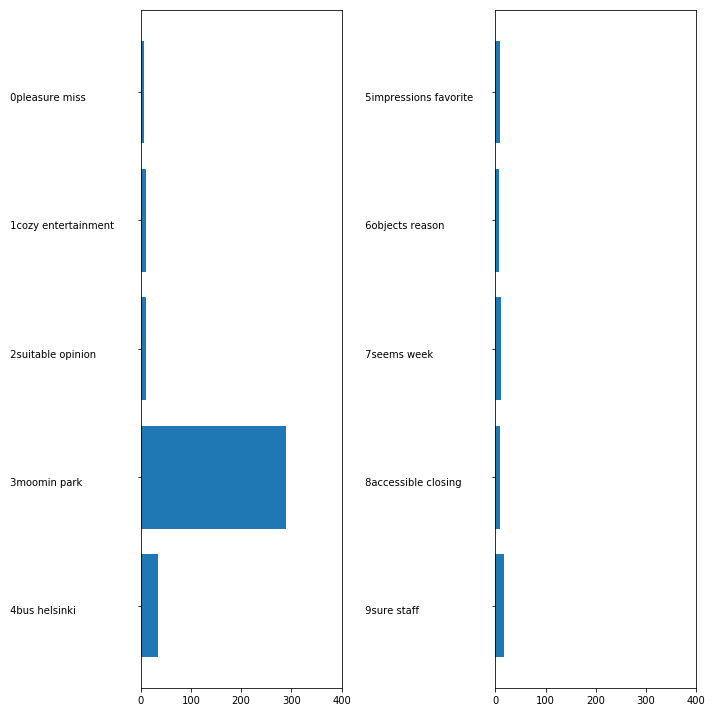

In [40]:
a=LDA_visualization(texts_list,stop_words,10)

In [2]:

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words=stop_words,max_df=100000,min_df=5,encoding='utf-8',ngram_range=(1, 1))
X=vect.fit_transform(texts_list)

from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10,learning_method='batch',max_iter=25,random_state=0)#random_state influence the results
documemt_topics=lda.fit_transform(X)

sorting=np.argsort(lda.components_,axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names()) #get the name of features

#print first 10 docuements
mglearn.tools.print_topics(topics=range(10),feature_names=feature_names,sorting=sorting,topics_per_chunk=5,n_words=10);
# LDA_visualization(texts_list,stop_words,10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
pleasure      cozy          suitable      moomin        bus           
miss          entertainment opinion       park          helsinki      
stayed        sweets        stayed        children      snufkin       
mini          completely    give          place         shops         
subtitles     territory     speak         world         train         
created       snacks        slightly      day           half          
necessary     calm          nearby        characters    30            
neither       girl          slide         kids          minutes       
true          advise        designed      nice          cost          
touched       photo         pricey        also          center        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
impr

In [79]:
np.argsort(lda.components_,axis=1)[:,::-1].shape

(10, 770)

In [67]:
sorting

array([[508, 410, 643, ..., 640, 601, 409],
       [144, 194, 666, ..., 255, 676, 601],
       [655, 460, 643, ..., 303, 432, 153],
       ...,
       [583, 748,  92, ...,  11, 639, 255],
       [ 15, 125, 329, ..., 255, 640, 601],
       [659, 637, 769, ..., 255, 639, 640]])

In [83]:
import dill
dill.dump_session('hehe.db')

In [1]:
import dill 
dill.load_session('hehe.db')

In [3]:
from textblob import TextBlob
import seaborn as sns
def senti_visual(texts_list):
    #get sentiments_polarity and sentiments_subjectivity based on text
    sentiments_polarity=[]
    sentiments_subjectivity=[]
    for i in texts_list:
#         pdb.set_trace()
        try:
            blob=TextBlob(str(i))
#             pdb.set_trace()
            sentiments_polarity.append(blob.sentiment.polarity)
            sentiments_subjectivity.append(blob.sentiment.subjectivity)
        except UnicodeEncodeError: 
#             i=unicode(i,'ascii').encode('UTF-8')
            blob=TextBlob(i)
            sentiments_polarity.append(blob.sentiment.polarity)
            sentiments_subjectivity.append(blob.sentiment.subjectivity)
    df=pd.DataFrame({'sentiments_polarity':sentiments_polarity,'sentiments_subjectivity':sentiments_subjectivity})
    sns.jointplot(df.iloc[:,0],df.iloc[:,1],kind='hex')

/Users/mayue/anaconda3/envs/py3/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


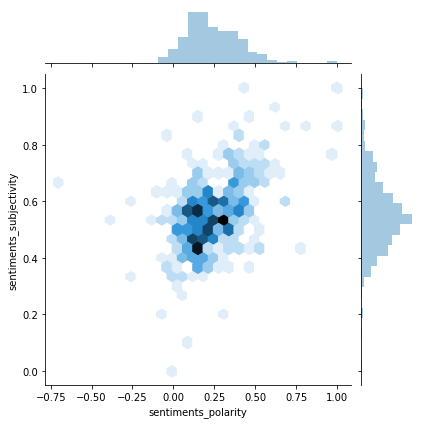

In [4]:
senti_visual(texts_list)